## 42577 Introduction to Business Analytics

# **Project: Airbnb rentals data exploration challange**

##  <span style='color:green'> 1. Introduction </span> <br>

##  <span style='color:green'> 2. Data analysis and Visualization </span> <br>

###  <span style='color:blue'> 2.1. Data Cleaning </span> <br>

In [157]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
# Read the dataset from the CSV file
dataset = pd.read_csv('listings.csv')

In [159]:
# Dispaly few variables
dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,6983,26057,26473,29118,31094,32379,32841,33680,37159,38499
name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse","165 m2 artist flat on Vesterbro, with 2 bathr...",Cozy flat for Adults/Quiet for kids,Best location on Vesterbro/Cph,Unique space on greatest location,0 min. from everything in Cph.
host_id,16774,109777,112210,125230,129976,140105,142143,145671,160390,122489
host_name,Simon,Kari,Julia,Nana,Ebbe,Lise,Anders & Maria,Mette,Jeanette,Christina
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave,sterbro,Vesterbro-Kongens Enghave,Indre By,Indre By
latitude,55.6864,55.6931,55.676,55.6702,55.6666,55.6726,55.7118,55.6663,55.6855,55.6843
longitude,12.5474,12.5765,12.5754,12.555,12.5553,12.5525,12.5709,12.5456,12.5654,12.573
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954,1280,617,1000,2916,1900


In [160]:
# Retrive useful information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13815 non-null  int64  
 1   name                            13815 non-null  object 
 2   host_id                         13815 non-null  int64  
 3   host_name                       13814 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13815 non-null  object 
 6   latitude                        13815 non-null  float64
 7   longitude                       13815 non-null  float64
 8   room_type                       13815 non-null  object 
 9   price                           13815 non-null  int64  
 10  minimum_nights                  13815 non-null  int64  
 11  number_of_reviews               13815 non-null  int64  
 12  last_review                     

In [161]:
# Observe wether null values are present
dataset.isnull().any()

id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool

***True indicates a null value and False indicates there is no null value. We can observe that there are 5 columns containing null values. `host_name` column is missing one data point, `last_review` and `reviews_per_month`columns are missing 1645 data points. We can notice that column `neighbourhood_group` and `license` are containing no data points at all.***

***In order to remove the null values we are replacing them using mode and mean.***

In [162]:
# Replace missing values
dataset["host_name"].fillna(dataset["host_name"].mode()[0], inplace = True)
dataset["last_review"].fillna(dataset["last_review"].mode()[0], inplace = True)
dataset["reviews_per_month"].fillna(dataset["reviews_per_month"].mean(), inplace = True)
# Delete columns with no recordings
del dataset["neighbourhood_group"]
del dataset["license"]

In [163]:
# Search for duplicate rows in the dataset 
duplicate_check = dataset["id"].duplicated()
duplicate_check

0        False
1        False
2        False
3        False
4        False
         ...  
13810    False
13811    False
13812    False
13813    False
13814    False
Name: id, Length: 13815, dtype: bool

In [164]:
duplicate_check = dataset["id"].duplicated().any()
duplicate_check

False

***By using the function `.duplicated()` the values of the given dataset are passed to the parameters for searching duplicate values. All values in the printed boolean series are `False` which indicates that there are no duplicated  `id` values in our dataset. Each `id` value in the listing is unique.***

***Since we know that all the values in the `id` column are unique, we can set this column as an index for our dataset.***

In [165]:
dataset.set_index("id", inplace=True)
dataset.head().T

id,6983,26057,26473,29118,31094
name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse"
host_id,16774,109777,112210,125230,129976
host_name,Simon,Kari,Julia,Nana,Ebbe
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.6864,55.6931,55.676,55.6702,55.6666
longitude,12.5474,12.5765,12.5754,12.555,12.5553
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954
minimum_nights,3,4,3,7,3
number_of_reviews,172,59,300,24,19


In [166]:
# Acces any record from the dataset
dataset.iloc[5]

name                              165 m2  artist flat on Vesterbro, with 2 bathr...
host_id                                                                      140105
host_name                                                                      Lise
neighbourhood                                             Vesterbro-Kongens Enghave
latitude                                                                    55.6726
longitude                                                                   12.5525
room_type                                                           Entire home/apt
price                                                                          1280
minimum_nights                                                                    3
number_of_reviews                                                                80
last_review                                                              2022-08-13
reviews_per_month                                                           

In [167]:
# Renaming column of dataset for better interpretation
new_col = {'name':'listing_name'}

dataset.rename(columns=new_col, inplace=True)
dataset.head().T

id,6983,26057,26473,29118,31094
listing_name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse"
host_id,16774,109777,112210,125230,129976
host_name,Simon,Kari,Julia,Nana,Ebbe
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.6864,55.6931,55.676,55.6702,55.6666
longitude,12.5474,12.5765,12.5754,12.555,12.5553
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954
minimum_nights,3,4,3,7,3
number_of_reviews,172,59,300,24,19


In [168]:
# Convert date object type to datetime
dataset['last_review'] = pd.to_datetime(dataset['last_review'], format='%Y-%m-%d')

In [169]:
dataset.head().T

id,6983,26057,26473,29118,31094
listing_name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse"
host_id,16774,109777,112210,125230,129976
host_name,Simon,Kari,Julia,Nana,Ebbe
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.6864,55.6931,55.676,55.6702,55.6666
longitude,12.5474,12.5765,12.5754,12.555,12.5553
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954
minimum_nights,3,4,3,7,3
number_of_reviews,172,59,300,24,19


In [170]:
# Sort the dataset based on the price  
dataset = dataset.sort_values(by='price', ascending=True)

In [171]:
# Exclude the listing with 0 for price
dataset = dataset[dataset.price > 0]
dataset.head()

,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,,,,,
39000504,Cosy room in fabulous condo!,25580883,Annabella,Nrrebro,55.68941,12.56260,Private room,79,1,28,2022-09-15,0.770000,2,38,22
41285362,Copenhagen loft apartment at Nørrebro,116485169,Olivia,Bispebjerg,55.69991,12.53602,Entire home/apt,113,1,0,2022-09-18,0.903816,1,0,0
48652028,Room for rent in shared accommodation,225782385,Nitesh,Bispebjerg,55.70316,12.53422,Private room,120,1,0,2022-09-18,0.903816,1,0,0
47282476,IVORY TOWER,247828624,Oiram,Brnshj-Husum,55.71841,12.48477,Private room,124,90,0,2022-09-18,0.903816,1,0,0
51107459,LOVELY ROOM FOR RENT IN VALBY COPENHAGEN,412918036,Cinthia,Valby,55.65435,12.50645,Private room,127,7,2,2021-08-30,0.150000,1,0,0


***In order to perform further analysis in our dataset we need to properly prepare the data. Defining outliers is an essential part of the data analytics process. The outliers are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values—either being much larger or significantly smaller. One way to spot the outliers is using the function `.describe()` which generates a statistical summary. Outliers in the column of price will influence the analysis so this is where we will focus on.***

In [172]:
#Statistical summary of the column price
dataset['price'].describe()

count    13813.000000
mean      1206.053573
std       1433.173437
min         79.000000
25%        729.000000
50%        995.000000
75%       1369.000000
max      64900.000000
Name: price, dtype: float64

***We can notice that the max value is 64900 which is a large number compare to the mean which is only 1205, this indicates that the max value is an outlier. So we decided to use a data visualization technique to spot the outliers in detail. 
Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data.***

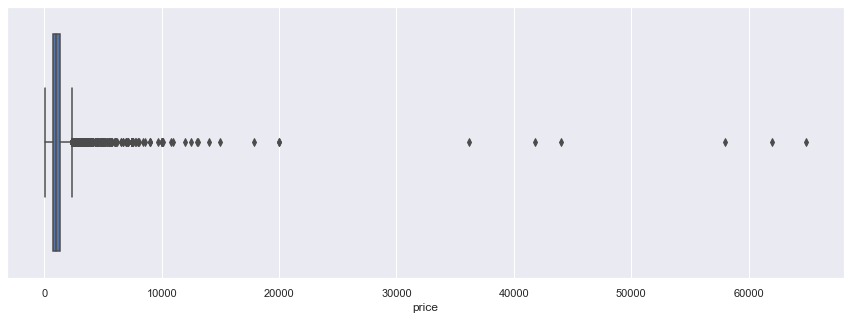

In [173]:
import seaborn as sns
# Create a boxplot to idetify outliers
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(x = dataset["price"])
plt.show()

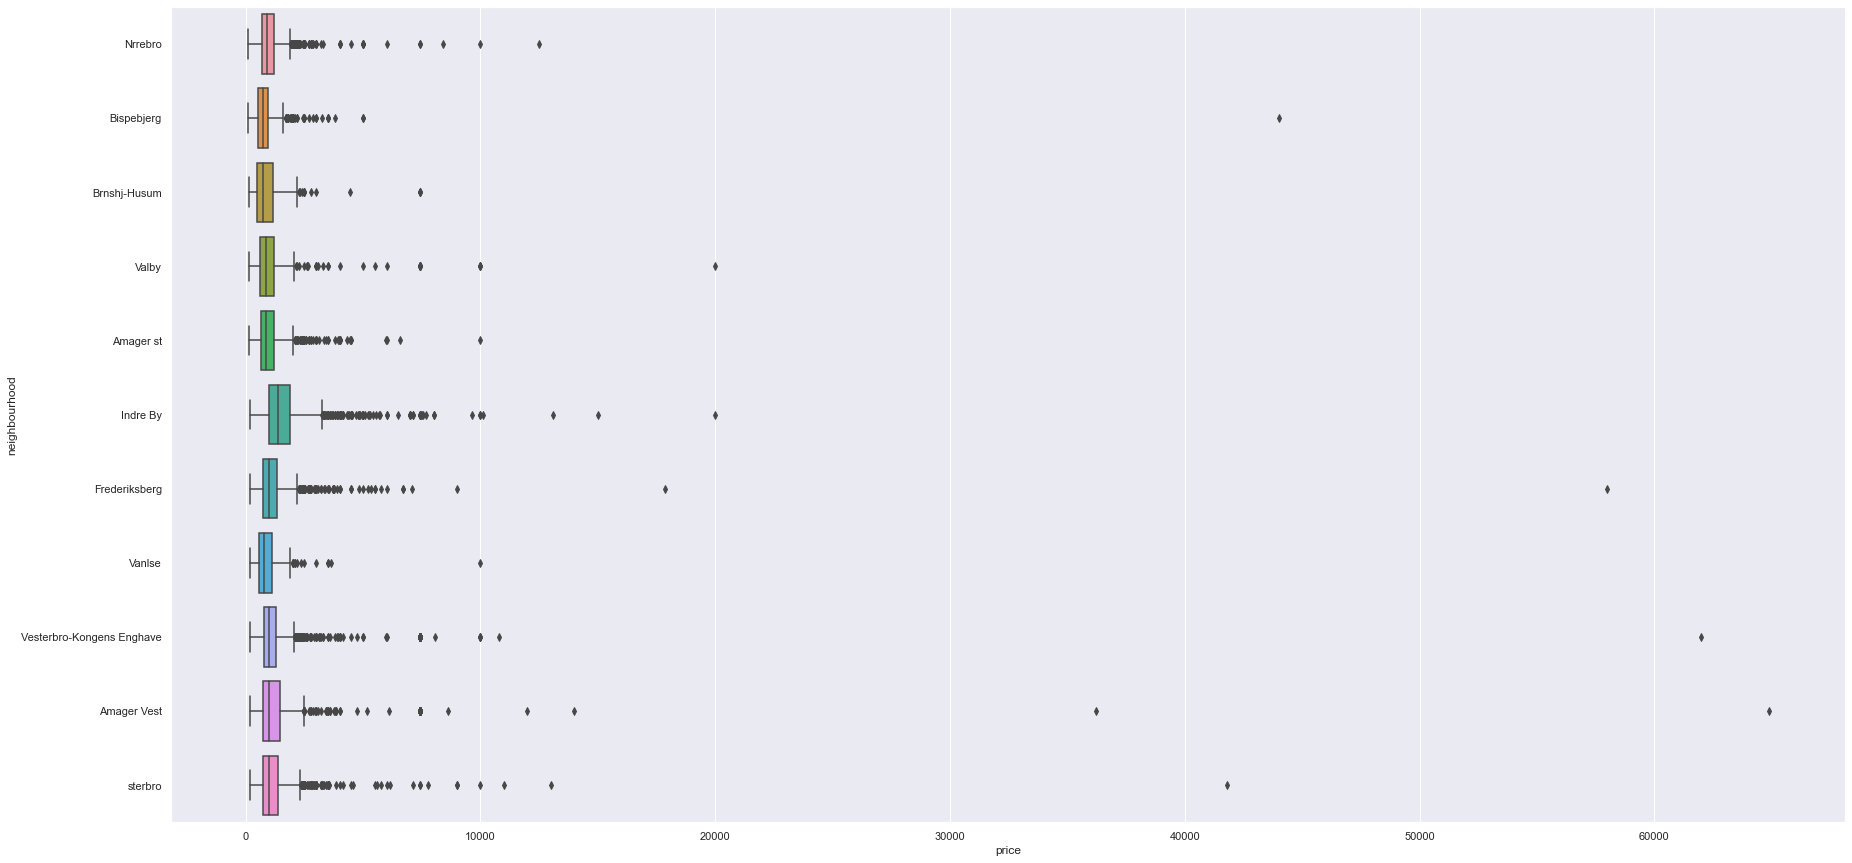

In [174]:
# Create multiple boxplots depending on neighbourhood areas
sns.set(rc={"figure.figsize":(30, 15)})
sns.boxplot(data=dataset, x="price", y="neighbourhood")
plt.show()

***The thick line in the middle represents the median. The bottom line is the 25% percentile and the top line is the 75% percentile value of the data. The points that lie outside these lines, that is, (1.5 x IQR) in both directions are generally considered as outliers.***

In [175]:
# Count the outliers that are above the 75% 
print("Number of outliers found above the 75%:")
len(dataset[dataset.price>1368.5])

Number of outliers found above the 75%:


3454

In [176]:
#Count the outliers that are below the 25% (we used the values shown from the statistical summary)
print("Number of outliers found below the 25%:")
len(dataset[dataset.price<729])

Number of outliers found below the 25%:


3447

In [177]:
Q1 = dataset["price"].quantile(0.25)
Q3 = dataset["price"].quantile(0.75)
IQR = Q3 - Q1
IQR

640.0

In [178]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [179]:
lower_lim

-231.0

In [180]:
upper_lim

2329.0

#  <span style='color:green'> 3. Exploratory Component </span> <br>

***Starting the dataset exploration, observing useful information we can use later in the analysis.***

In [42]:
# Categorize the number of listings based on the room type 
room_type_count = dataset.room_type.value_counts()
room_type_count

Entire home/apt    12230
Private room        1551
Shared room           19
Hotel room            15
Name: room_type, dtype: int64

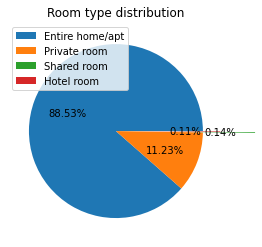

In [94]:
# Visualize the room type distribution 
explode = (0, 0, 0.6, 0.2)
plt.pie(room_type_count, explode=explode, autopct='%.2f%%')
plt.legend(room_type_count.index, loc = "upper left")
plt.title("Room type distribution")
plt.show()

##  <span style='color:green'> 4. Prediction Challange </span> <br>

##  <span style='color:green'> 5. Conclusions </span> <br>